## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np

np.random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
cols = X.columns
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
print('Пропуски', X.isna().sum().sum())
X.dtypes


Пропуски 0


alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [5]:
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train[['alcohol', 'magnesium']])
x_test_scaled = scaler.transform(x_test[['alcohol', 'magnesium']])

print('NN   Train   Test')

models = []

for neighbors in [1, 3, 5, 10, 15, 25]:
    model = KNeighborsClassifier(n_neighbors=neighbors)
    model.fit(x_train_scaled, y_train)
    models.append(model)
    train_predictions = model.predict(x_train_scaled)
    train_accuracy = accuracy_score(y_train, train_predictions)

    test_predictions = model.predict(x_test_scaled)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f'{neighbors}   {train_accuracy:.2f}   {test_accuracy:.2f}')


NN   Train   Test
1   0.99   0.67
3   0.84   0.65
5   0.81   0.69
10   0.81   0.70
15   0.78   0.69
25   0.73   0.69


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [6]:
!pip install mlxtend

You should consider upgrading via the 'C:\Users\Амир\PROGRAMMING\Python Interpriter 3.9\python.exe -m pip install --upgrade pip' command.


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [7]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

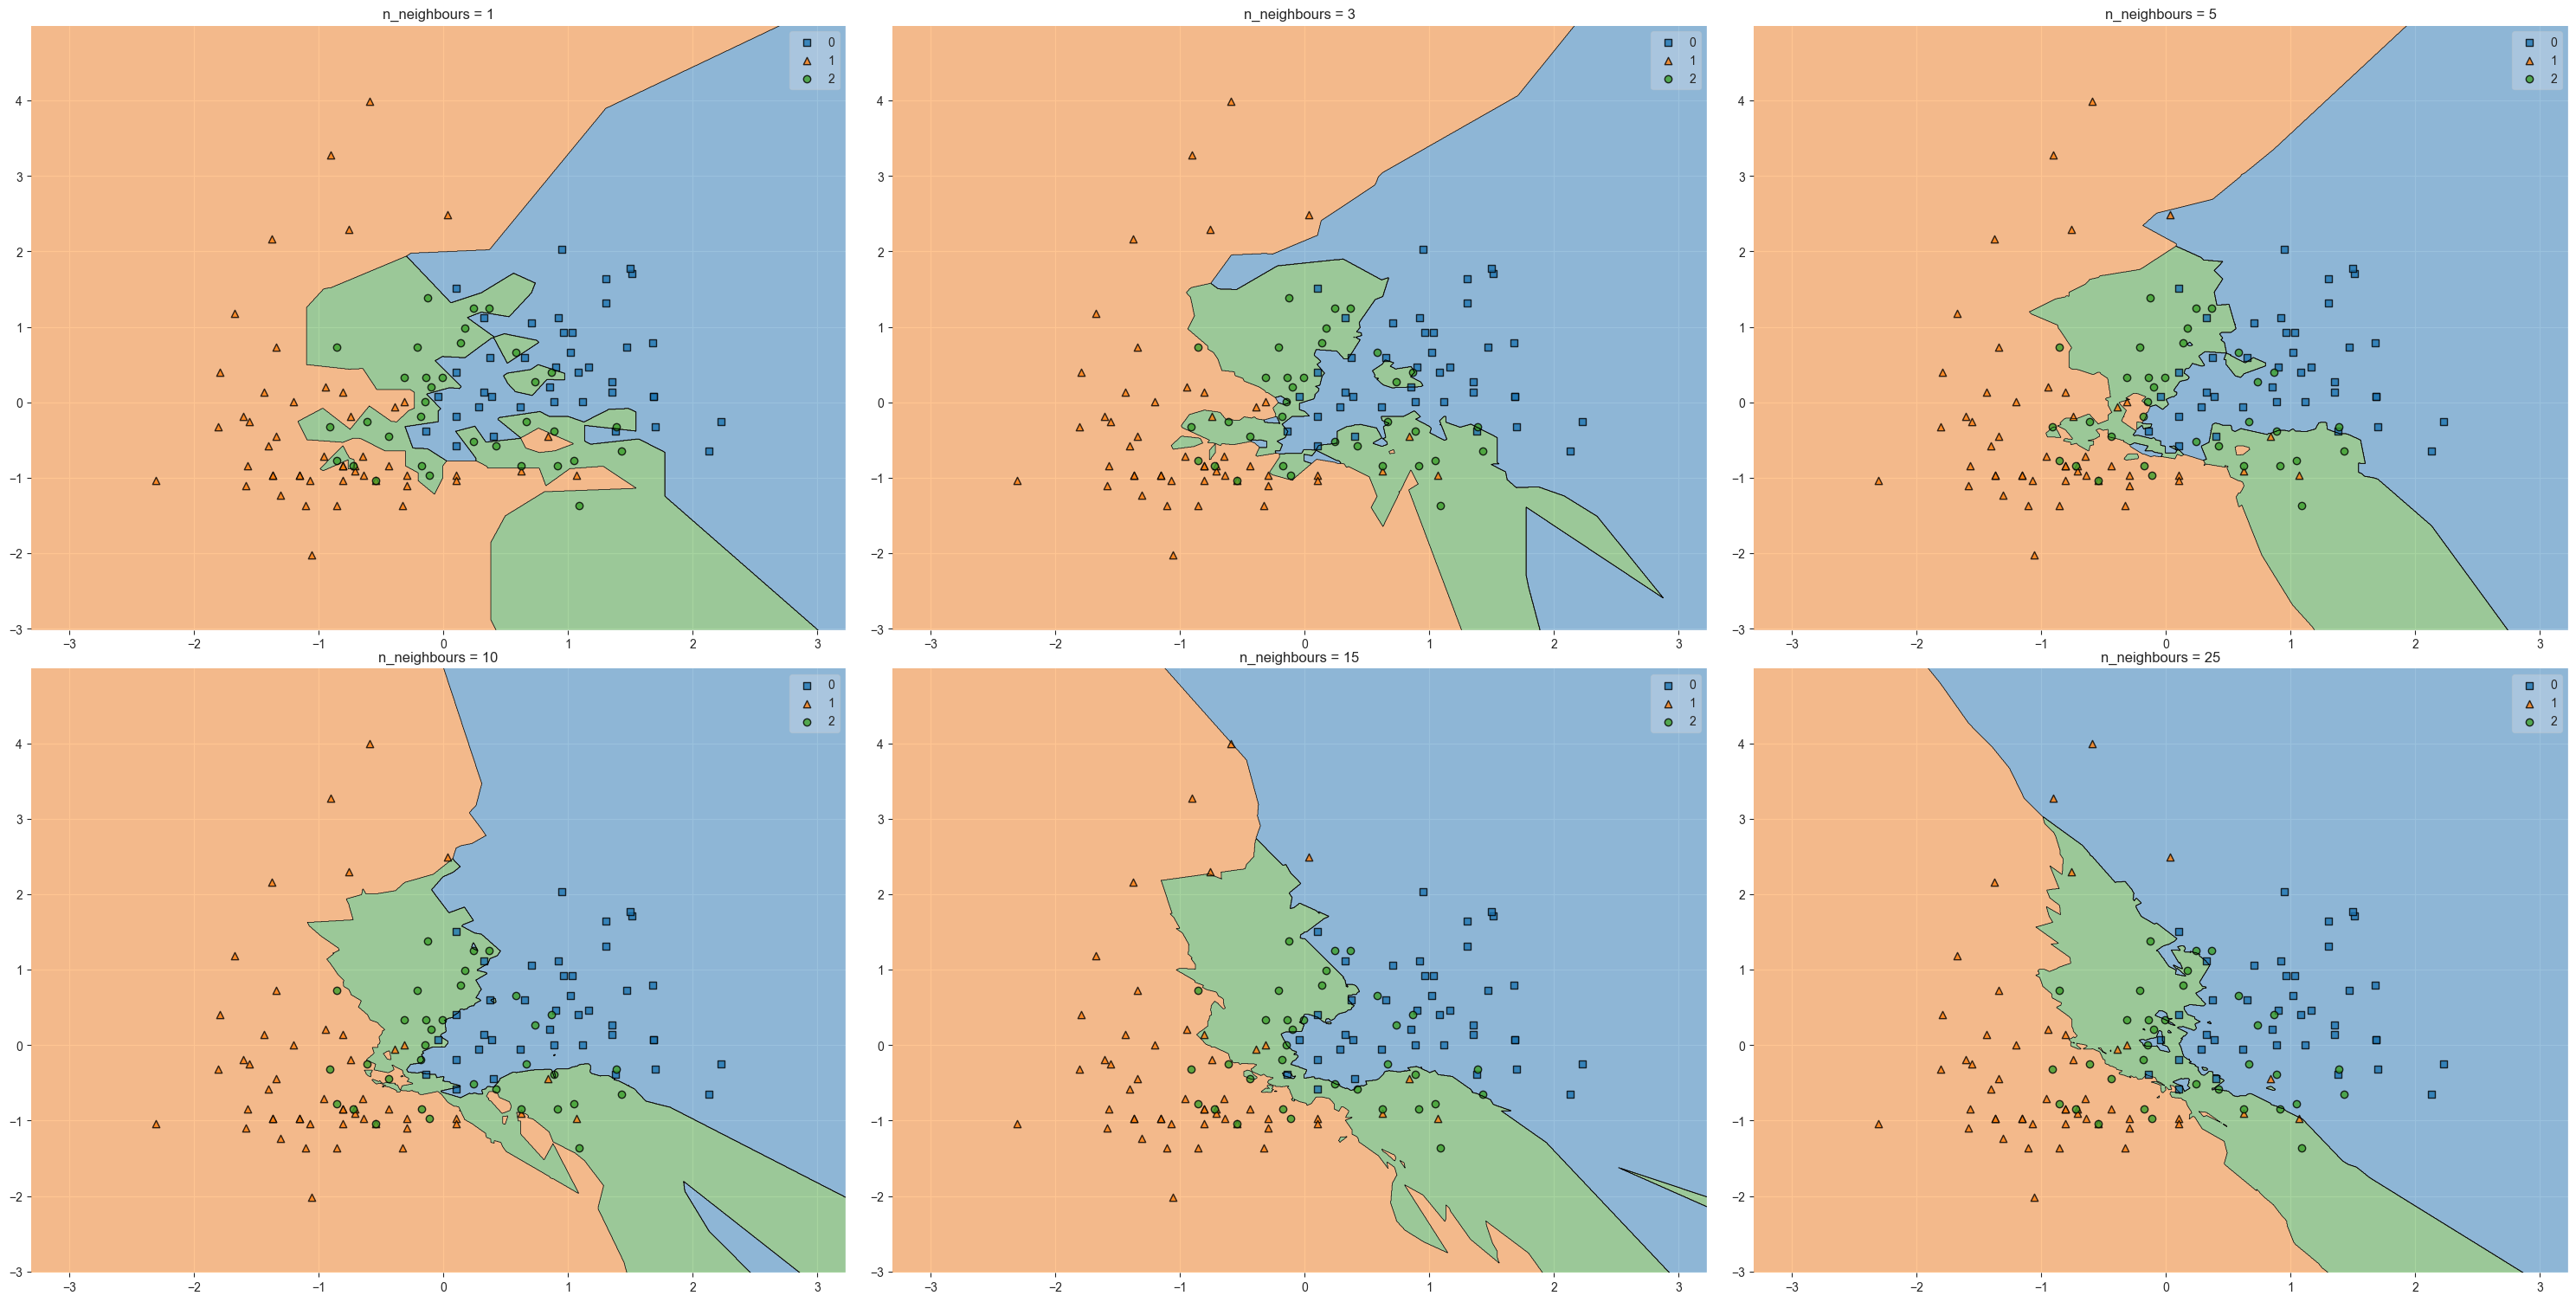

<Figure size 1920x1440 with 0 Axes>

In [8]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))
plt.subplots_adjust(hspace=1, wspace=1)
plt.tight_layout()
plt.figure(dpi=300)

for knn, ax, n in zip(models, axes.flatten(), [1, 3, 5, 10, 15, 25]):
    plot_decision_regions(X=x_train_scaled, y=y_train, clf=knn, ax=ax)
    ax.set_title(f'n_neighbours = {n}')
plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

In [ ]:
# Оптимальное количество соседей - 5 или 10, так как при этом количестве заметно четкое разделение классов. При меньших значениях происходит переобучение, а при больших мо одели не удается распознать мелкие "кучки" отдельных классов, из-за чего на тестевой выборке модель показывает себя хуже.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

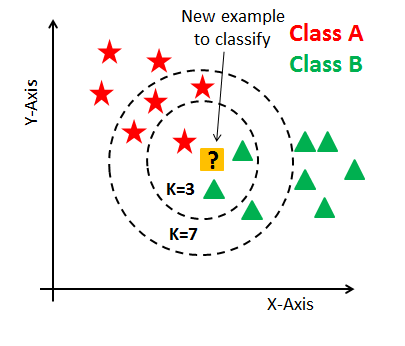

In [9]:
import numpy as np
from collections import Counter


class KNN:
    def __init__(self, k: int):
        self.k = k

    def fit(self, X, y):
        # YOUR CODE HERE
        # Запоминаем тестовую выборку
        self.x_train = X
        self.y_train = y

    def predict(self, X):
        # YOUR CODE HERE
        predictions = []

        for i in X:
            distances = []
            # Вычисляем расстояния до всех объектов тренировочной выборки
            for j in self.x_train:
                distances.append(np.linalg.norm(i - j))
                
            # Находим индексы, а затем метки ближайших соседей
            k_nearest_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]
            
            # Находим самый часто встречающийся клас
            most_often = Counter(k_nearest_labels).most_common(1)
            predictions.append(most_often[0][0])

        return np.array(predictions)

In [10]:
# Не меняйте файл!
def test_knn(KNN):
    knn = KNN(k=1)
    X_train = np.array([[1, 1], [2, 2]])
    y_train = np.array([0, 1])
    X_test = np.array([[1.5, 1.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [0]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[9.5, 9.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[5.5, 5.5]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[15, 15]])
    knn.fit(X_train, y_train)
    assert knn.predict(X_test) == [1]

    knn = KNN(k=3)
    X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
    y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
    X_test = np.array([[5, 5], [2, 2]])
    knn.fit(X_train, y_train)
    assert all(knn.predict(X_test) == [1, 0])

In [11]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [12]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [13]:
print('Пропущенных значений', data.isna().sum().sum())

Пропущенных значений 0


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [ ]:
# Удаляем ненужный столбец Unnamed
data = data.drop('Unnamed: 0', axis=1)

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

C:\Users\Амир\AppData\Local\Temp\ipykernel_18728\107659126.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


<AxesSubplot: >

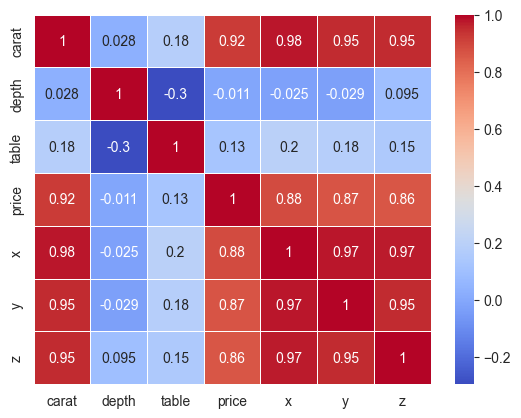

In [15]:
import seaborn as sns
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
# Больше всего коррелируют с целевой переменной: carat, x, y, z

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [16]:
data.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [17]:
data = pd.get_dummies(data, columns=['cut', 'color', 'clarity'])
data

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(['price'], axis=1), data['price'], test_size=0.3, random_state=42)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = x_train
x_test_scaled = x_test

x_train_scaled[['carat', 'depth', 'table', 'x', 'y', 'z']] = scaler.fit_transform(x_train[['carat', 'depth', 'table', 'x', 'y', 'z']])
x_test_scaled[['carat', 'depth', 'table', 'x', 'y', 'z']] = scaler.transform(x_test[['carat', 'depth', 'table', 'x', 'y', 'z']])

In [20]:
x_train_scaled

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
19497,0.862659,-0.311437,-0.207099,1.055581,0.986556,0.968253,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
31229,-1.029889,0.178549,-0.656213,-1.207734,-1.202544,-1.168276,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
22311,0.862659,0.458541,-0.207099,0.904099,0.951670,0.982309,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
278,0.021527,0.598537,-1.105327,0.164512,0.192898,0.251391,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6646,-0.020530,-0.031445,-0.656213,0.182333,0.184176,0.181110,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.526206,0.458541,0.691128,0.663511,0.672581,0.715243,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
44732,-0.693436,-0.521432,-1.105327,-0.628540,-0.635646,-0.676312,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
38158,-0.987832,-1.011418,0.242014,-1.109717,-1.115329,-1.182333,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
860,0.210782,0.738533,0.691128,0.351636,0.253949,0.391952,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(x_train_scaled, y_train)

print(f'MSE на тренировочной выборке {mean_squared_error(y_train, model.predict(x_train_scaled))}')
print(f'MSE на тестовой выборке {mean_squared_error(y_test, model.predict(x_test_scaled))}')

MSE на тренировочной выборке 1290541.9147450614
MSE на тестовой выборке 1244765.4357158684


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [22]:
x_test_scaled

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1388,-1.177087,0.248547,-0.656213,-1.573073,-1.516519,-1.505623,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
50052,-0.462124,-1.221412,-0.207099,-0.263201,-0.278064,-0.395190,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41645,-0.840634,0.248547,-1.105327,-0.869128,-0.871127,-0.830930,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
42377,-0.777549,-0.661428,-0.207099,-0.726557,-0.740304,-0.788761,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
17244,1.577621,0.388543,-1.105327,1.518937,1.422631,1.502385,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29577,-0.819606,-0.381435,0.691128,-0.851307,-0.801355,-0.844986,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
12564,0.547234,0.878529,-1.105327,0.672421,0.611531,0.757411,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
24786,1.493508,-0.661428,1.140242,1.501116,1.431353,1.347768,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1332,-0.188756,-1.991391,1.589356,0.057584,0.140569,-0.142180,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
display(model.coef_)
# На порядок превышают прочие коэффициенты - carat, X

array([ 5.33861567e+03, -9.01738170e+01, -6.03322799e+01, -1.10041885e+03,
       -6.45891672e+00, -3.42589446e+01, -5.92557732e+02,  2.96334798e+00,
        2.53638525e+02,  1.85212231e+02,  1.50743628e+02,  8.35314553e+02,
        6.18285586e+02,  5.62010577e+02,  3.35154315e+02, -1.63320116e+02,
       -6.40769680e+02, -1.54667524e+03, -3.88960977e+03,  1.56942753e+03,
       -1.37900094e+02, -1.10766922e+03,  7.68224542e+02,  4.47115818e+02,
        1.21172542e+03,  1.13868577e+03])

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [24]:
from sklearn.linear_model import Lasso, Ridge
np.set_printoptions(precision=2, suppress=True)


l_model = Lasso(alpha=10)
r_model = Ridge(alpha=10)

l_model.fit(x_train_scaled, y_train)
r_model.fit(x_train_scaled, y_train)

print(f'Среднее значение весов для регрессии без регуляризации {np.mean(model.coef_)}')
print(f'Веса регрессии без регуляризации {model.coef_}\n')

print(f'Среднее значение весов Lasso  {np.mean(l_model.coef_)}')
print(f'Веса Lasso {l_model.coef_}\n')

print(f'Среднее значение весов Ridge  {np.mean(r_model.coef_)}')
print(f'Веса Ridge {r_model.coef_}')

Среднее значение весов для регрессии без регуляризации 155.65280239578635
Веса регрессии без регуляризации [ 5338.62   -90.17   -60.33 -1100.42    -6.46   -34.26  -592.56     2.96
   253.64   185.21   150.74   835.31   618.29   562.01   335.15  -163.32
  -640.77 -1546.68 -3889.61  1569.43  -137.9  -1107.67   768.22   447.12
  1211.73  1138.69]

Среднее значение весов Lasso  -99.54083598283533
Веса Lasso [ 4853.41  -100.47   -80.37  -696.79    -0.     -32.6   -443.37   -32.47
    83.51     0.       0.     350.36   176.45   131.49     0.    -433.43
  -846.58 -1649.84 -3635.75   725.39  -617.77 -1525.26   160.06   -24.57
   538.33   512.22]

Среднее значение весов Ridge  155.54220109001332
Веса Ridge [ 5298.93   -88.82   -60.8  -1058.75    -9.05   -37.41  -594.94     3.01
   254.5    185.25   152.18   830.4    614.58   558.39   333.5   -163.36
  -637.52 -1535.98 -3815.49  1549.24  -146.09 -1111.45   757.96   438.42
  1199.64  1127.77]



Из-за проблемы мультиколлинеарности в начальной модели, можно заметить, что изменение практически не затронуло вещественные переменные. А следовательно качество предсказания модели не улучшилось. В Lasso регрессии занулились веса категориальных признаков, но вещественные остались нетронутыми.


**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

C:\Users\Амир\PROGRAMMING\Python Interpriter 3.9\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.548e+07, tolerance: 6.061e+07
  model = cd_fast.enet_coordinate_descent(


Text(0.5, 1.0, 'Ridge')

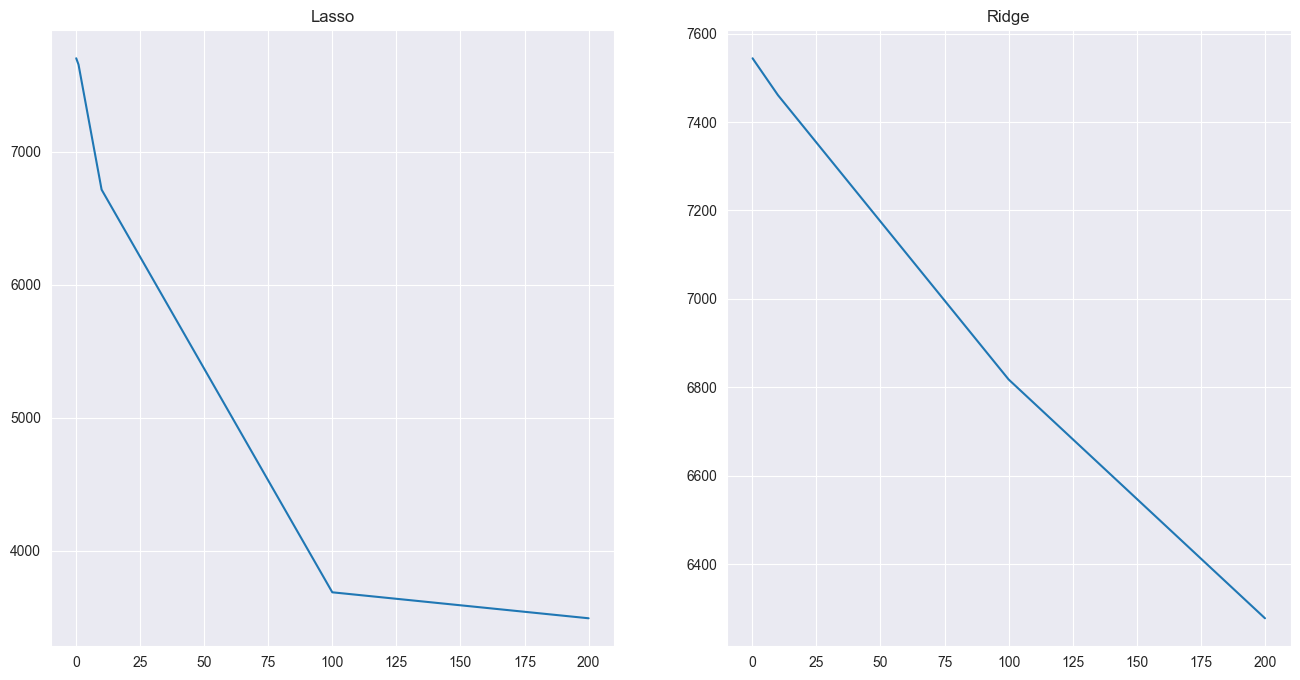

In [25]:
alphas = [0.1, 1, 10, 100, 200]
l_norms = []
r_norms = []

for i in alphas:
    l_model = Lasso(alpha=i)
    l_model.fit(x_train_scaled, y_train)
    
    r_model = Ridge(alpha=i)
    r_model.fit(x_train_scaled, y_train)
    
    l_norms.append(np.linalg.norm(l_model.coef_))
    r_norms.append(np.linalg.norm(r_model.coef_))



fig, ax = plt.subplots(1, 2)
fig.set_size_inches(16,8)
ax[0].plot(alphas, l_norms)
ax[0].set_title('Lasso')
ax[1].plot(alphas, r_norms)
ax[1].set_title('Ridge')

# Lasso намного агрессивнее занижает веса. Этот метод регрессии чаще используют для отбора признаков, так как он может занулять некоторые веса, которые соответствуют неважным признакам.


**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [35]:
from sklearn.linear_model import LassoCV
model = LassoCV(cv=5, alphas=alphas)
model.fit(x_train_scaled, y_train)
for i, n in enumerate(model.mse_path_):
    print(f'Alpha: {model.alphas_[i]}, MSE: {round(np.mean(n), 2)}')
    
# Наилучшее качество при alpha = 1

C:\Users\Амир\PROGRAMMING\Python Interpriter 3.9\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 511839175.6619034, tolerance: 48476565.46527788
  model = cd_fast.enet_coordinate_descent_gram(


Alpha: 200.0, MSE: 2454496.09
Alpha: 100.0, MSE: 2253981.92
Alpha: 10.0, MSE: 1330613.98
Alpha: 1.0, MSE: 1293926.68
Alpha: 0.1, MSE: 1295630.4


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [27]:
l_model = Lasso(alpha=1)
l_model.fit(x_train_scaled, y_train)
display(l_model.coef_)
x_train_scaled

# Наиболее информативными признаками оказались: carat, clarity, color. Наименее информативными оказались depth, table и cut.
# Я считаю что вес, чистоту и цвет камня нельзя изменить вследствие обработки, поэтому они очень сильно влияют на его цену, а огранку и соотношение сторон можно изменить при желании, поэтому они почти не влияют на стоимость.

array([ 5290.02,   -91.21,   -62.2 , -1061.66,    -3.49,   -34.62,
        -714.62,  -137.73,    99.64,    28.2 ,     0.  ,   485.58,
         272.77,   217.6 ,     0.  ,  -491.67,  -962.76, -1858.44,
       -4357.89,   991.17,  -679.82, -1643.29,   213.56,   -93.89,
         650.46,   582.07])

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
19497,0.862659,-0.311437,-0.207099,1.055581,0.986556,0.968253,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
31229,-1.029889,0.178549,-0.656213,-1.207734,-1.202544,-1.168276,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
22311,0.862659,0.458541,-0.207099,0.904099,0.951670,0.982309,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
278,0.021527,0.598537,-1.105327,0.164512,0.192898,0.251391,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6646,-0.020530,-0.031445,-0.656213,0.182333,0.184176,0.181110,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,0.526206,0.458541,0.691128,0.663511,0.672581,0.715243,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
44732,-0.693436,-0.521432,-1.105327,-0.628540,-0.635646,-0.676312,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
38158,-0.987832,-1.011418,0.242014,-1.109717,-1.115329,-1.182333,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
860,0.210782,0.738533,0.691128,0.351636,0.253949,0.391952,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [28]:
l_pred = l_model.predict(x_test_scaled)

model = LinearRegression()
model.fit(x_train_scaled, y_train)

pred = model.predict(x_test_scaled)

print(f'Lasso MSE: {mean_squared_error(y_test, l_pred)}')
print(f'Base regression MSE: {mean_squared_error(y_test, pred)}')

# Результат Lasso оказался лучше обычной регрессии благодаря регуляризации и отбрасыванию ненужных признаков.


Lasso MSE: 1244173.0045646103
Base regression MSE: 1244765.4357158684
